In [1]:
# Import des librairies

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split

# Pour transformer les str en dict

import ast

# Pour l'energie Star

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Pour le OHE

from sklearn.preprocessing import OneHotEncoder

In [2]:
# On règle les paramètres de pandas et de la visualisation

sns.set(font_scale = 3,rc={'figure.figsize':(60,20)})

pd.options.display.max_columns = 200

pd.options.display.max_rows = 1000

pd.options.display.max_colwidth = 50

In [3]:
# On récupère la donnée

data_2016_path = 'donnée_new/2016_Building_Energy_Benchmarking.csv'
data_2016 = pd.read_csv(data_2016_path,sep=',',low_memory=False)

In [4]:
data_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

In [5]:
# Fonction pratique

def information_basique(data): 
    '''
    Affiche le .shape, .info, .describe d'un dataframe 
    Parameters :
    ----------
    data : pd.DataFrame
    Return:
    ------
    '''
    
    print('\033[1m'+'Shape :\n'+'\033[0m',data.shape,'\n')

    print('\033[1m'+'Info :'+'\033[0m')

    data.info()
    
    print('\033[1m'+'\nDescription :')
    
    display(data.describe())

def show_missing_data_graph(data):
    '''
    Affiche un graphique du % de remplissage de chaque colonne : 
    Parameters :
    ----------
    data : pd.DataFrame
    Return:
    ------
    '''
    missing_data = round((1 - data.isna().sum()/len(data)),3)
    label = missing_data.index

    sns.barplot(x = label, y = missing_data)
    plt.title('Donnée disponible',fontsize=100)
    plt.xticks(rotation=90)
    plt.tight_layout()
    
# pour une map de correlation un peu plus claire (le bout de code a été récupéré) 
def plot_correl_map(data) :
    correl = data.corr()
    mask = np.zeros_like(correl, dtype=bool) # all false with corr shape
    mask[np.triu_indices_from(mask)] = True # Return the indices for the upper-triangle of mask

    fig, ax = plt.subplots( figsize=(10,7) )
    sns.heatmap(correl, mask=mask, vmin=-1, cmap='coolwarm', annot=True, fmt='.1g',)
    plt.show()   

In [6]:
information_basique(data_2016)

Shape :
 (3376, 46) 

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   obje

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


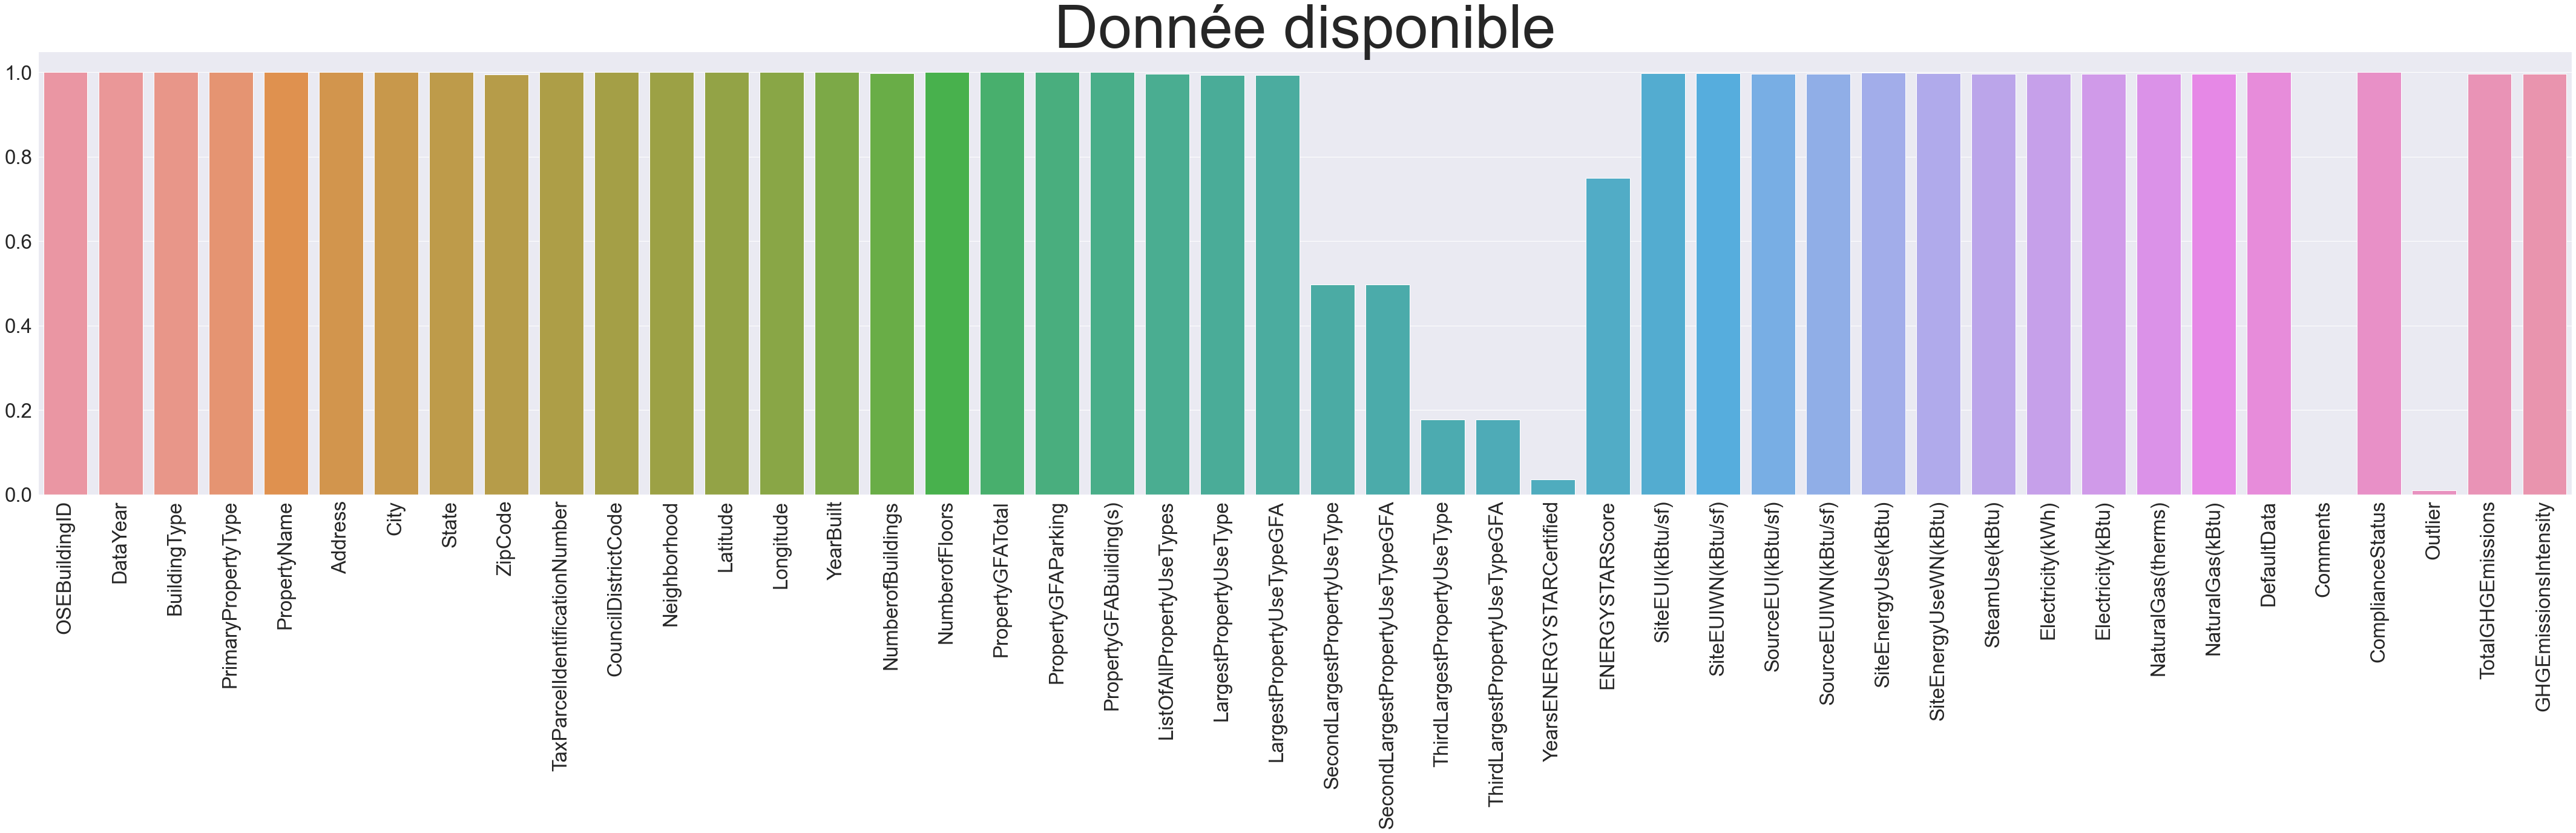

In [7]:
show_missing_data_graph(data_2016)

In [8]:
# On drop les colonnes avec trop de données manquante ( +50%)

def drop_data_threshold(data,threshold): 
    '''
    drop les colonnes avec trop de données manquante ( + threshold)
    Parameters :
    ----------
    data : pd.DataFrame
    threshold : float (compris entre 0 et 1)
    Return:
    data_drop : pd.DataFrame
    ------
    '''
    data_drop = data.copy()
    data_drop.dropna(axis = 1, how='all',thresh=len(data_drop)*threshold, inplace=True)
    return data_drop

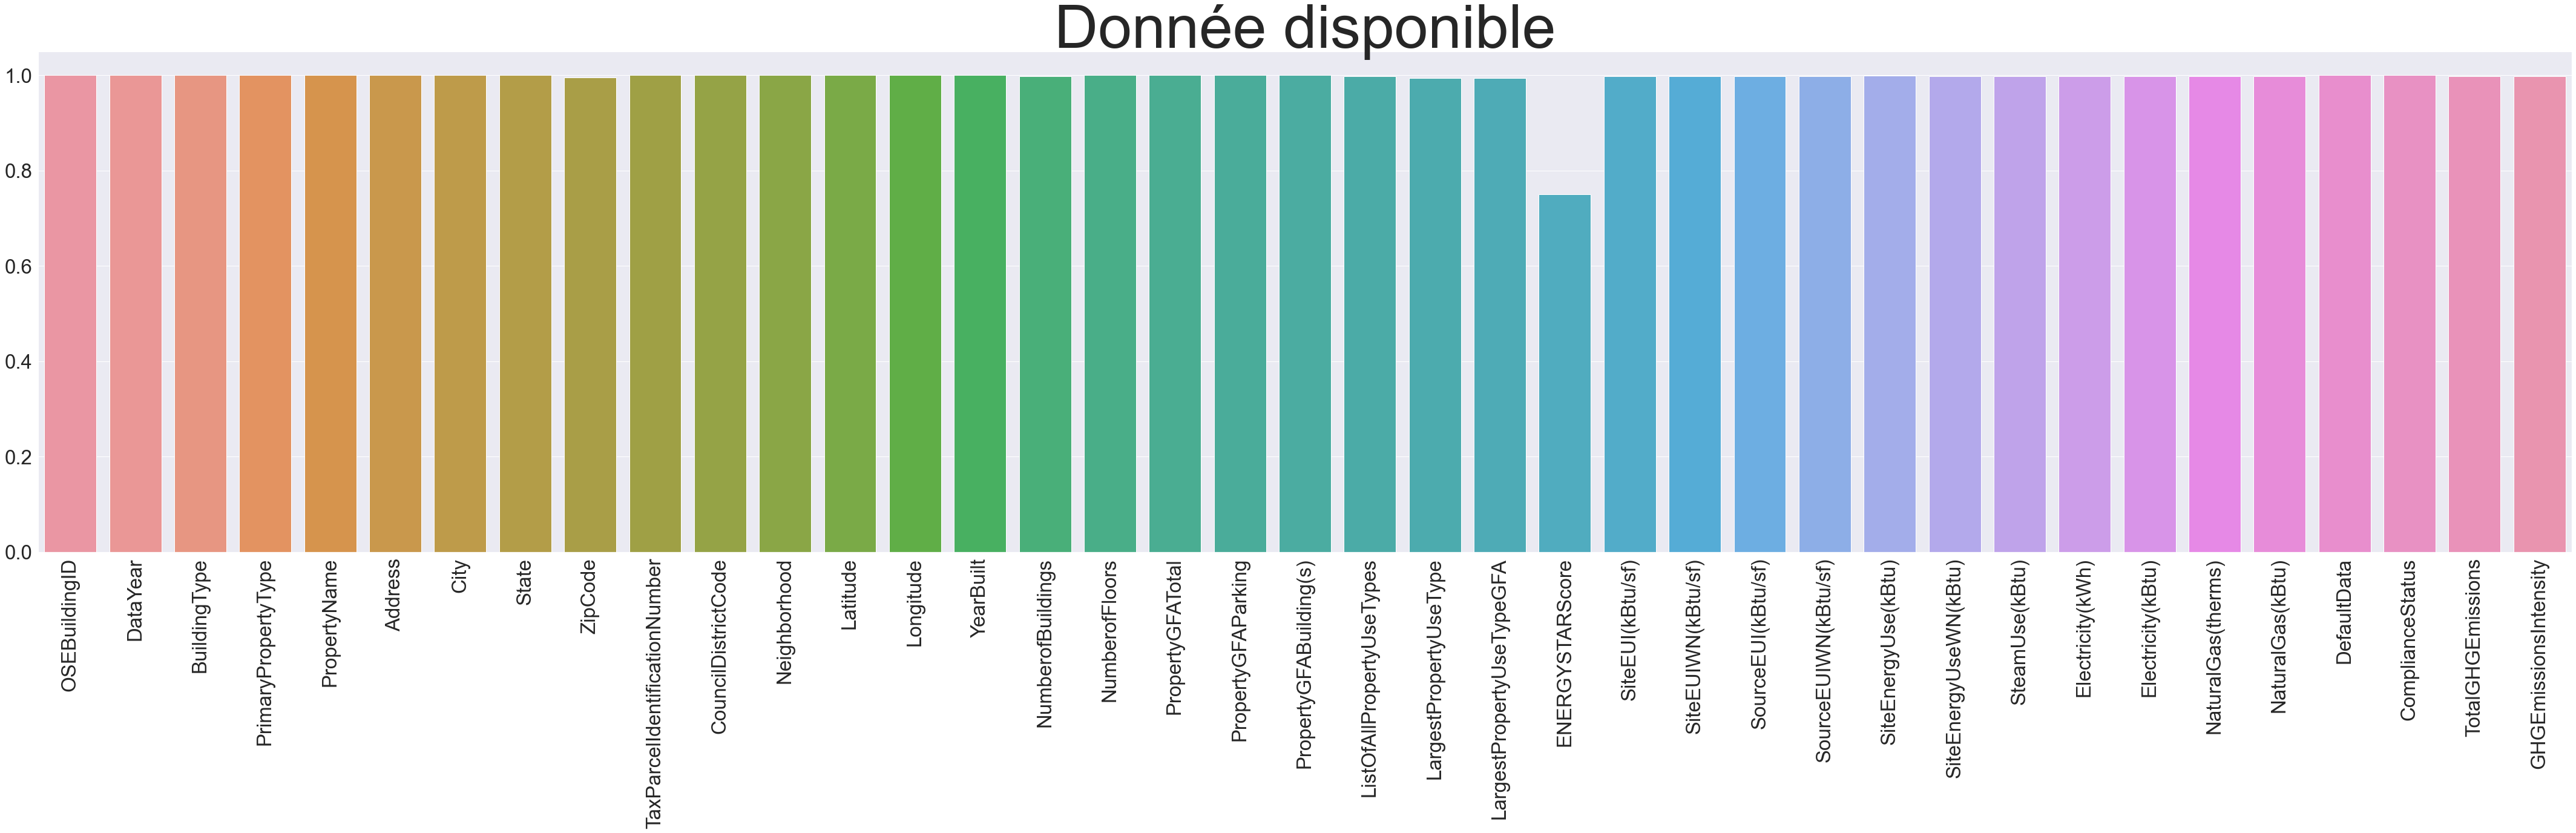

In [9]:
data_2016_drop = drop_data_threshold(data_2016,0.5)
show_missing_data_graph(data_2016_drop)

In [10]:
#On va calculer la distance au centre villle de chaque habitation
# Seattle coordinate :
#Latitude	47.617004
#Longitude	-122.343506

lat = 47.617004
long = -122.343506

In [11]:
# Calcul de la distance haversine avec fonction récupéré

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [12]:
h = lambda x:haversine(x.Longitude,x.Latitude,long,lat)

data_2016_drop['Haversine'] = data_2016_drop.apply(h,axis=1)

In [13]:
data_2016_drop.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Haversine
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83,0.675504
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86,0.834850
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19,0.530129
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67,0.606389
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88,0.427443


In [14]:
data_2016_drop.dtypes

OSEBuildingID                      int64
DataYear                           int64
BuildingType                      object
PrimaryPropertyType               object
PropertyName                      object
Address                           object
City                              object
State                             object
ZipCode                          float64
TaxParcelIdentificationNumber     object
CouncilDistrictCode                int64
Neighborhood                      object
Latitude                         float64
Longitude                        float64
YearBuilt                          int64
NumberofBuildings                float64
NumberofFloors                     int64
PropertyGFATotal                   int64
PropertyGFAParking                 int64
PropertyGFABuilding(s)             int64
ListOfAllPropertyUseTypes         object
LargestPropertyUseType            object
LargestPropertyUseTypeGFA        float64
ENERGYSTARScore                  float64
SiteEUI(kBtu/sf)

In [15]:
# On va à présent observer les colonnes categoriel et choisir celle que l'on va garder

cat = data_2016_drop.select_dtypes(include=[object,bool]).columns

cat

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address',
       'City', 'State', 'TaxParcelIdentificationNumber', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'DefaultData',
       'ComplianceStatus'],
      dtype='object')

In [16]:
for i in cat :
    print(i)
    print(data_2016_drop[i].unique(),'\n')

BuildingType
['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA'] 

PrimaryPropertyType
['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Low-Rise Multifamily' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Restaurant'
 'High-Rise Multifamily' 'Office'] 

PropertyName
['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center'] 

Address
['405 Olive way' '724 Pine street' '1900 5th Avenue' ... '1920 1st Ave W'
 '8319 8th Ave S' '2820 S Myrtle St'] 

City
['Seattle'] 

State
['WA'] 

TaxParcelIdentificationNumber
['065900003

In [17]:
# Pour le moment, on n'utilisera pas Neighborhood

to_drop_cat = ['PropertyName','Address','City','State','Neighborhood',\
           'TaxParcelIdentificationNumber','ListOfAllPropertyUseTypes','LargestPropertyUseType'\
               ,'DefaultData','ComplianceStatus']
len(to_drop_cat)

10

In [18]:
# On vérifie qu'il n'y a pas de colonne cat dans les colonnes numériques
# Et on vérifie quelle colonne on veut garder

num = data_2016_drop.select_dtypes(exclude=[object,bool]).columns

num

Index(['OSEBuildingID', 'DataYear', 'ZipCode', 'CouncilDistrictCode',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Haversine'],
      dtype='object')

In [19]:
for i in num :
    print(i)
    print(data_2016_drop[i].unique(),'\n')

OSEBuildingID
[    1     2     3 ... 50224 50225 50226] 

DataYear
[2016] 

ZipCode
[98101. 98121. 98104. 98154. 98118. 98105. 98112. 98125. 98109. 98070.
 98108. 98199. 98115. 98107. 98144. 98103. 98119. 98136. 98122. 98126.
 98133. 98146. 98033. 98106. 98111. 98134. 98117. 98116. 98191. 98164.
 98195. 98185. 98181. 98102. 98168. 98155. 98006. 98124. 98053. 98012.
 98013. 98028. 98178. 98114. 98127. 98165. 98011. 98198. 98113. 98040.
 98204. 98177. 98020. 98272. 98145.    nan] 

CouncilDistrictCode
[7 3 2 4 5 6 1] 

Latitude
[47.6122  47.61317 47.61393 ... 47.56722 47.52832 47.53939] 

Longitude
[-122.33799 -122.33393 -122.3381  ... -122.37441 -122.31154 -122.29536] 

YearBuilt
[1927 1996 1969 1926 1980 1999 1904 1910 1998 1928 1922 2004 1930 1983
 1907 1916 1985 1961 2001 1991 1955 1978 1949 1989 1906 1994 1992 1990
 1950 1900 1954 1911 1973 1920 1982 1908 1959 2000 1997 1962 1970 2008
 1948 1965 1929 2010 1938 1986 2002 1923 2003 1957 1964 1941 1963 2006
 1915 1958 2009 2011 1971 20

In [20]:
to_drop_num = ['OSEBuildingID','DataYear','ZipCode','Latitude','Longitude']
len(to_drop_num)

5

In [21]:
to_drop = to_drop_num + to_drop_cat
len(to_drop)

15

In [22]:
# On transforme ConcilDistrictCode en categorie

data_2016_drop['CouncilDistrictCode'] = data_2016_drop['CouncilDistrictCode'].astype(str)

In [23]:
data_2016_drop['CouncilDistrictCode']

0       7
1       7
2       7
3       7
4       7
       ..
3371    2
3372    2
3373    7
3374    1
3375    2
Name: CouncilDistrictCode, Length: 3376, dtype: object

In [24]:
# On se débarasse des colonnes non utilisé

data_2016_column = data_2016_drop.drop(columns=to_drop)

In [25]:
data_2016_column

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Haversine
0,NonResidential,Hotel,7,1927,1.0,12,88434,0,88434,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,0.675504
1,NonResidential,Hotel,7,1996,1.0,11,103566,15064,88502,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,0.834850
2,NonResidential,Hotel,7,1969,1.0,41,956110,196718,759392,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19,0.530129
3,NonResidential,Hotel,7,1926,1.0,10,61320,0,61320,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67,0.606389
4,NonResidential,Hotel,7,1980,1.0,18,175580,62000,113580,123445.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88,0.427443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,2,1990,1.0,1,12294,0,12294,12294.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,6.032459
3372,Nonresidential COS,Other,2,2004,1.0,1,16000,0,16000,16000.0,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,2.779996
3373,Nonresidential COS,Other,7,1974,1.0,1,13157,0,13157,7583.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,2.413426
3374,Nonresidential COS,Mixed Use Property,1,1989,1.0,1,14101,0,14101,6601.0,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,9.965802


In [26]:
# On commence par traiter le buildingtype pour extraire les batiments non residentiel pour la suite

data_2016_column['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [27]:
res = {'NonResidential':'NonResidential','Nonresidential COS':'NonResidential','Multifamily MR (5-9)':'Residential',\
      'SPS-District K-12':'NonResidential', 'Campus':'NonResidential', 'Multifamily LR (1-4)':'Residential',\
       'Multifamily HR (10+)':'Residential', 'Nonresidential WA':'NonResidential'}
res

{'NonResidential': 'NonResidential',
 'Nonresidential COS': 'NonResidential',
 'Multifamily MR (5-9)': 'Residential',
 'SPS-District K-12': 'NonResidential',
 'Campus': 'NonResidential',
 'Multifamily LR (1-4)': 'Residential',
 'Multifamily HR (10+)': 'Residential',
 'Nonresidential WA': 'NonResidential'}

In [28]:
data_2016_column['BuildingType'] = data_2016_column['BuildingType'].apply(lambda x : res[x])

In [29]:
# Plus qu'à filtrer uniquement les batiments NonResidentiel

data_2016_NoNResidential =data_2016_column[data_2016_column['BuildingType']=='NonResidential'].copy()

In [30]:
data_2016_NoNResidential

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Haversine
0,NonResidential,Hotel,7,1927,1.0,12,88434,0,88434,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,0.675504
1,NonResidential,Hotel,7,1996,1.0,11,103566,15064,88502,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,0.834850
2,NonResidential,Hotel,7,1969,1.0,41,956110,196718,759392,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19,0.530129
3,NonResidential,Hotel,7,1926,1.0,10,61320,0,61320,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67,0.606389
4,NonResidential,Hotel,7,1980,1.0,18,175580,62000,113580,123445.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88,0.427443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,NonResidential,Office,2,1990,1.0,1,12294,0,12294,12294.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,6.032459
3372,NonResidential,Other,2,2004,1.0,1,16000,0,16000,16000.0,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,2.779996
3373,NonResidential,Other,7,1974,1.0,1,13157,0,13157,7583.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,2.413426
3374,NonResidential,Mixed Use Property,1,1989,1.0,1,14101,0,14101,6601.0,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,9.965802


In [31]:
# On commence à présent à réduire le reste des colonnes categoriel

cat_2 = data_2016_NoNResidential.select_dtypes(include=[object,bool]).columns

for i in cat_2 :
    print(i)
    print(data_2016_NoNResidential[i].unique(),'\n')

BuildingType
['NonResidential'] 

PrimaryPropertyType
['Hotel' 'Other' 'Mixed Use Property' 'K-12 School' 'University'
 'Small- and Mid-Sized Office' 'Self-Storage Facility' 'Warehouse'
 'Large Office' 'Senior Care Community' 'Medical Office' 'Retail Store'
 'Hospital' 'Residence Hall' 'Distribution Center' 'Worship Facility'
 'Supermarket / Grocery Store' 'Laboratory' 'Refrigerated Warehouse'
 'Restaurant' 'Low-Rise Multifamily' 'Office'] 

CouncilDistrictCode
['7' '3' '2' '4' '5' '6' '1'] 



In [32]:
primary_proprety_cat = {'Hotel':'to_drop','Other':'Other','Mixed Use Property':'Other',\
                       'K-12 School':'School','University':'School','Small- and Mid-Sized Office':'Office',\
                       'Self-Storage Facility':'Storage','Warehouse':'Storage','Large Office':'Office',\
                        'Senior Care Community':'Medical','Medical Office':'Medical','Retail Store':'Store',\
                        'Hospital':'Medical','Residence Hall':'to_drop','Distribution Center':'Store',\
                        'Worship Facility':'Other','Supermarket / Grocery Store':'Store','Laboratory':'Medical',\
                        'Refrigerated Warehouse':'Storage','Restaurant':'Store','Low-Rise Multifamily':'to_drop',\
                        'Office':'Office'
                       }

In [33]:
data_2016_NoNResidential['PrimaryPropertyType'] = data_2016_NoNResidential['PrimaryPropertyType'].apply(lambda x : primary_proprety_cat[x])

In [34]:
data_2016_NoNResidential['PrimaryPropertyType']

0       to_drop
1       to_drop
2       to_drop
3       to_drop
4       to_drop
         ...   
3371     Office
3372      Other
3373      Other
3374      Other
3375      Other
Name: PrimaryPropertyType, Length: 1668, dtype: object

In [35]:
data_2016_NoNResidential['PrimaryPropertyType'].unique()

array(['to_drop', 'Other', 'School', 'Office', 'Storage', 'Medical',
       'Store'], dtype=object)

In [36]:
# On se debarasse de la categorie erronné

data_2016_correct_cat =data_2016_NoNResidential[data_2016_NoNResidential['PrimaryPropertyType']!='to_drop'].copy()

In [37]:
data_2016_correct_cat

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Haversine
5,NonResidential,Other,7,1999,1.0,2,97288,37198,60090,88830.0,NaN,136.100006,141.600006,316.299988,320.500000,1.208662e+07,1.258171e+07,0.000,2.160444e+06,7.371434e+06,47151.816410,4.715182e+06,301.81,3.10,0.526965
7,NonResidential,Other,7,1926,1.0,8,102761,0,102761,102761.0,NaN,61.299999,68.800003,141.699997,152.300003,6.298132e+06,7.067882e+06,2276286.500,1.065843e+06,3.636655e+06,3851.890137,3.851890e+05,221.51,2.16,1.000639
15,NonResidential,Other,7,2004,1.0,11,412000,57000,355000,364913.0,NaN,50.799999,51.099998,155.600006,156.000000,1.858886e+07,1.870691e+07,737559.500,5.231916e+06,1.785130e+07,0.000000,0.000000e+00,181.38,0.44,1.410882
16,NonResidential,Other,7,1930,1.0,6,103911,0,103911,90000.0,NaN,76.599998,78.400002,157.399994,159.600006,9.956396e+06,1.019212e+07,4592347.500,1.305354e+06,4.453868e+06,9101.799805,9.101800e+05,433.86,4.18,1.514269
18,NonResidential,Other,7,1907,1.0,5,57452,0,57452,16442.0,NaN,132.399994,137.100006,280.700012,285.000000,7.606084e+06,7.877219e+06,1776201.875,1.103397e+06,3.764791e+06,20650.912110,2.065091e+06,273.02,4.75,1.592267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,NonResidential,Office,2,1990,1.0,1,12294,0,12294,12294.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.000,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,6.032459
3372,NonResidential,Other,2,2004,1.0,1,16000,0,16000,16000.0,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.000,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,2.779996
3373,NonResidential,Other,7,1974,1.0,1,13157,0,13157,7583.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.000,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,2.413426
3374,NonResidential,Other,1,1989,1.0,1,14101,0,14101,6601.0,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.000,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,9.965802


In [38]:
# Pour observer la correlation

target = data_2016_correct_cat[['SiteEnergyUse(kBtu)','TotalGHGEmissions']].copy()

# On divisera le dataset entre les deux valeurs target plus tard, et on s'occuppera de leur correlation à ce moment là

data_for_corr = data_2016_correct_cat.drop(columns=['SiteEnergyUse(kBtu)','TotalGHGEmissions']).copy()

In [39]:
data_2016_correct_cat['PrimaryPropertyType'].unique()

array(['Other', 'School', 'Office', 'Storage', 'Medical', 'Store'],
      dtype=object)

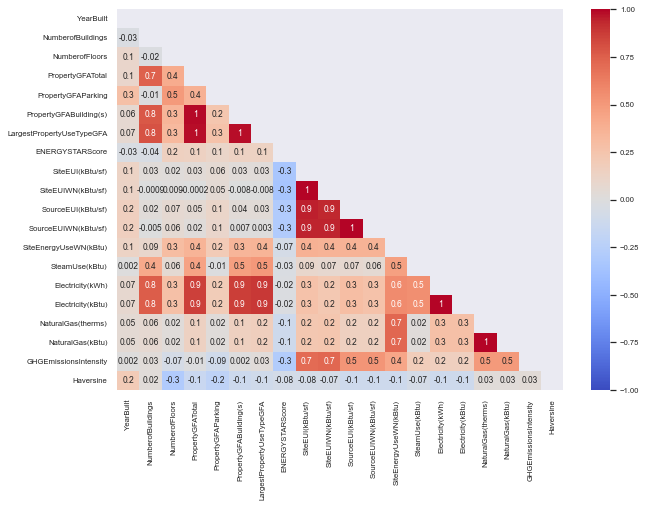

In [40]:
# On verifie les correlations entre les colonnes

sns.set(font_scale = 0.7,rc={'figure.figsize':(60,20)})
plot_correl_map(data_for_corr)

In [41]:
data_2016_correct_cat.select_dtypes(exclude=[object,bool]).columns

Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Haversine'],
      dtype='object')

In [42]:
# Faisons la liste des colonnes numériques trop correlés dont on va se debarasser

# 'PropertyGFATotal' -> 'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','Electricity(kWh)', 'Electricity(kBtu)'
# 'SiteEUI(kBtu/sf)' -> 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)'
#'NaturalGas(kBtu)' ->'NaturalGas(therms)'
### 'TotalGHGEmissions' -> 'SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','NaturalGas(kBtu)'### OUTDATED

# On se debarasse de Parking car ils ne sont pas du tout correlés avec les cibles

drop_corr = ['PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','Electricity(kWh)', 'Electricity(kBtu)',\
             'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',\
             'NaturalGas(therms)'
            ]

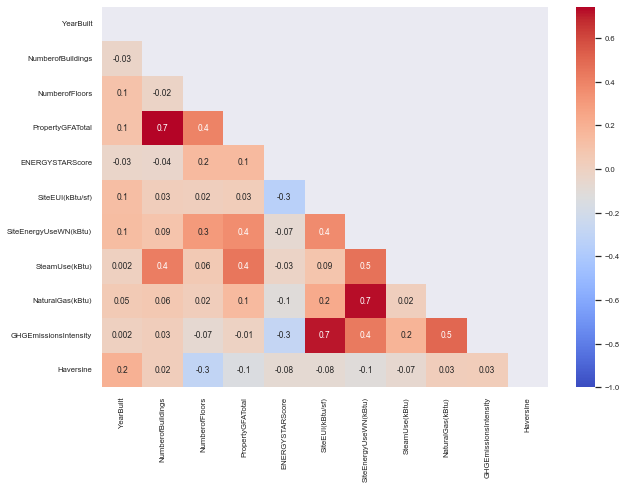

In [43]:
# On verifie que les correlations restantes sont bien inférieur à 0.8

sns.set(font_scale = 0.7,rc={'figure.figsize':(60,20)})
plot_correl_map(data_for_corr.drop(columns=drop_corr))

In [44]:
data_2016_corr_drop = data_2016_correct_cat.drop(columns=drop_corr).copy()

In [45]:
data_2016_corr_drop.select_dtypes(exclude=[object,bool])

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Haversine
5,1999,1.0,2,97288,NaN,136.100006,1.208662e+07,1.258171e+07,0.000,4.715182e+06,301.81,3.10,0.526965
7,1926,1.0,8,102761,NaN,61.299999,6.298132e+06,7.067882e+06,2276286.500,3.851890e+05,221.51,2.16,1.000639
15,2004,1.0,11,412000,NaN,50.799999,1.858886e+07,1.870691e+07,737559.500,0.000000e+00,181.38,0.44,1.410882
16,1930,1.0,6,103911,NaN,76.599998,9.956396e+06,1.019212e+07,4592347.500,9.101800e+05,433.86,4.18,1.514269
18,1907,1.0,5,57452,NaN,132.399994,7.606084e+06,7.877219e+06,1776201.875,2.065091e+06,273.02,4.75,1.592267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,1990,1.0,1,12294,46.0,69.099998,8.497457e+05,9.430032e+05,0.000,3.254750e+05,20.94,1.70,6.032459
3372,2004,1.0,1,16000,NaN,59.400002,9.502762e+05,1.053706e+06,0.000,5.537300e+05,32.17,2.01,2.779996
3373,1974,1.0,1,13157,NaN,438.200012,5.765898e+06,6.053764e+06,0.000,3.973739e+06,223.54,16.99,2.413426
3374,1989,1.0,1,14101,NaN,51.000000,7.194712e+05,7.828413e+05,0.000,3.706010e+05,22.11,1.57,9.965802


In [46]:
colonne = data_2016_corr_drop.select_dtypes(exclude=[object,bool]).columns

In [47]:
# On utilisera pas de KNN pour le moment

#imputer_star = KNNImputer()
#data_2016_corr_drop[colonne]=imputer_star.fit_transform(data_2016_corr_drop[colonne])

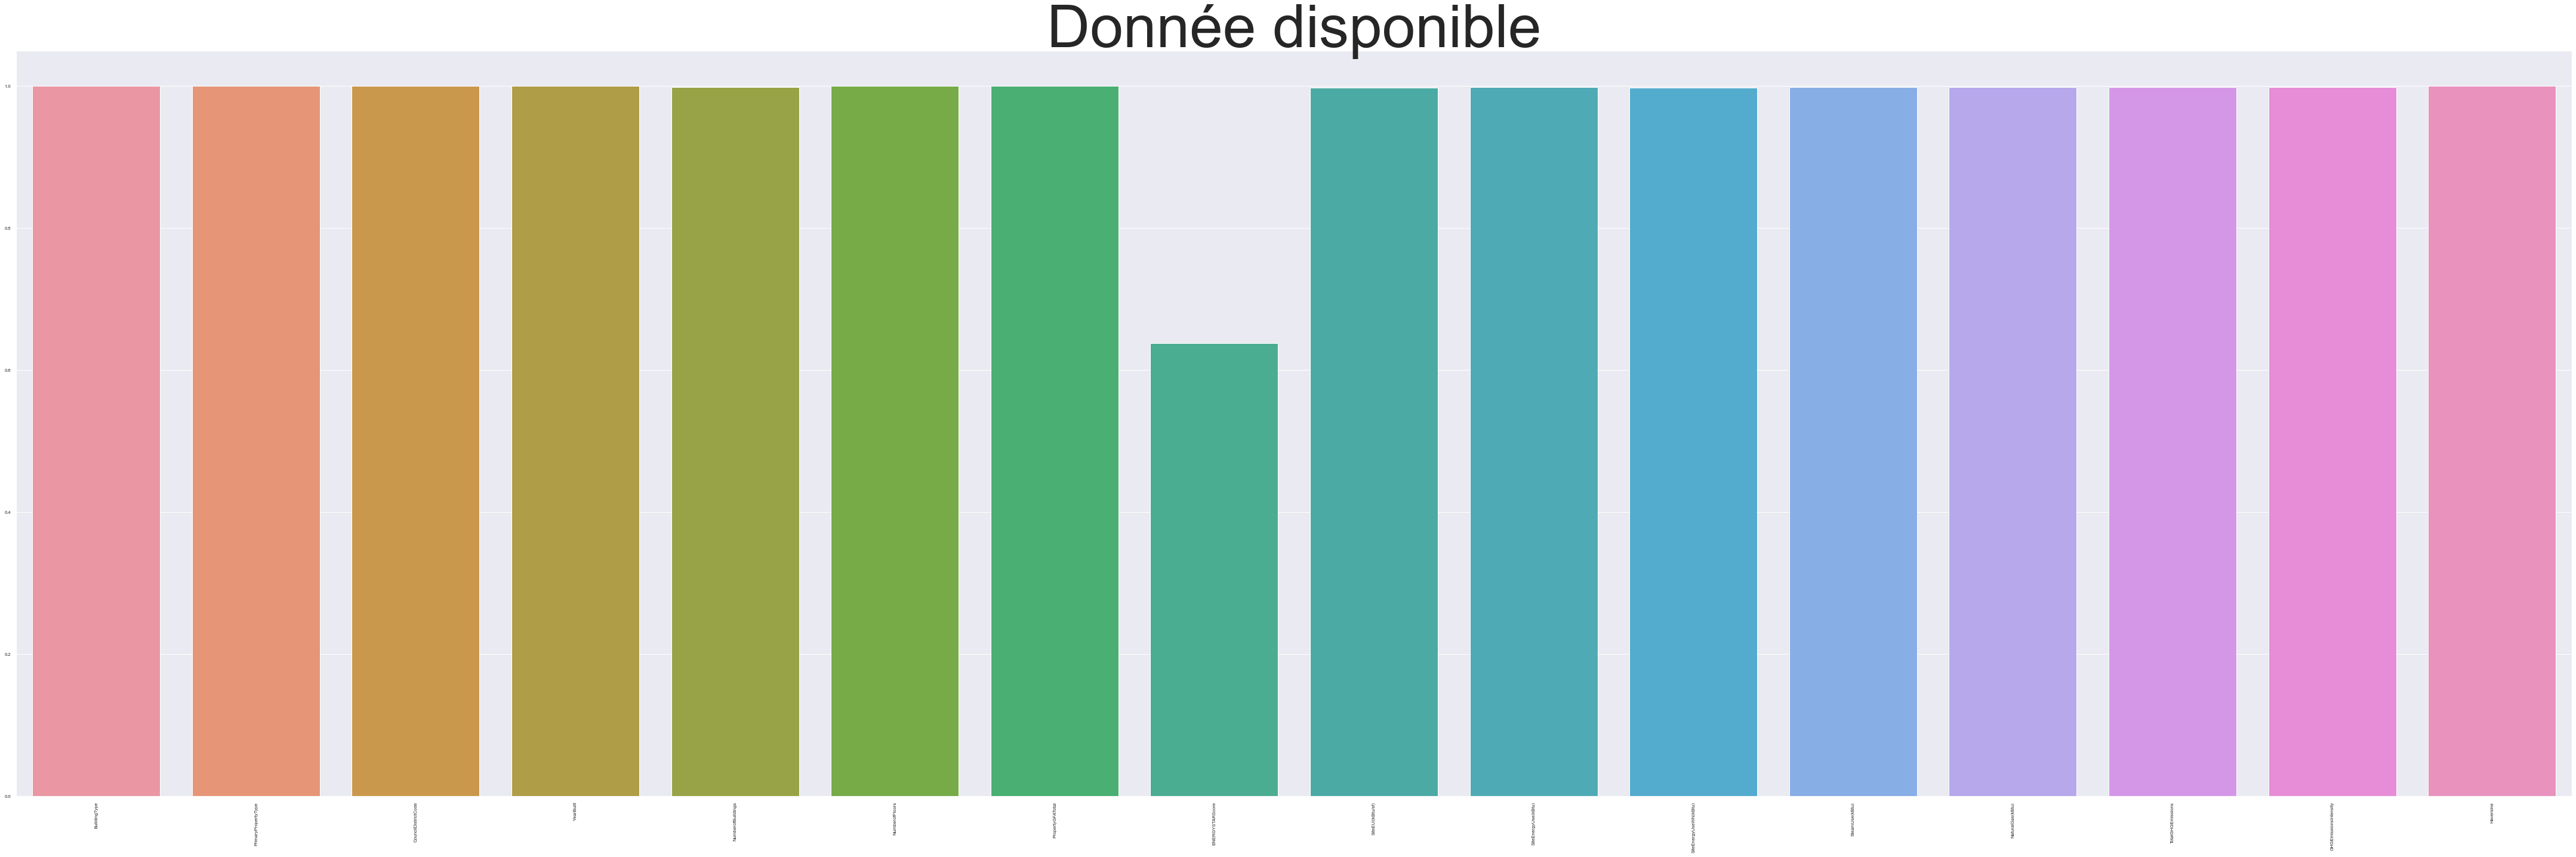

In [48]:
show_missing_data_graph(data_2016_corr_drop)

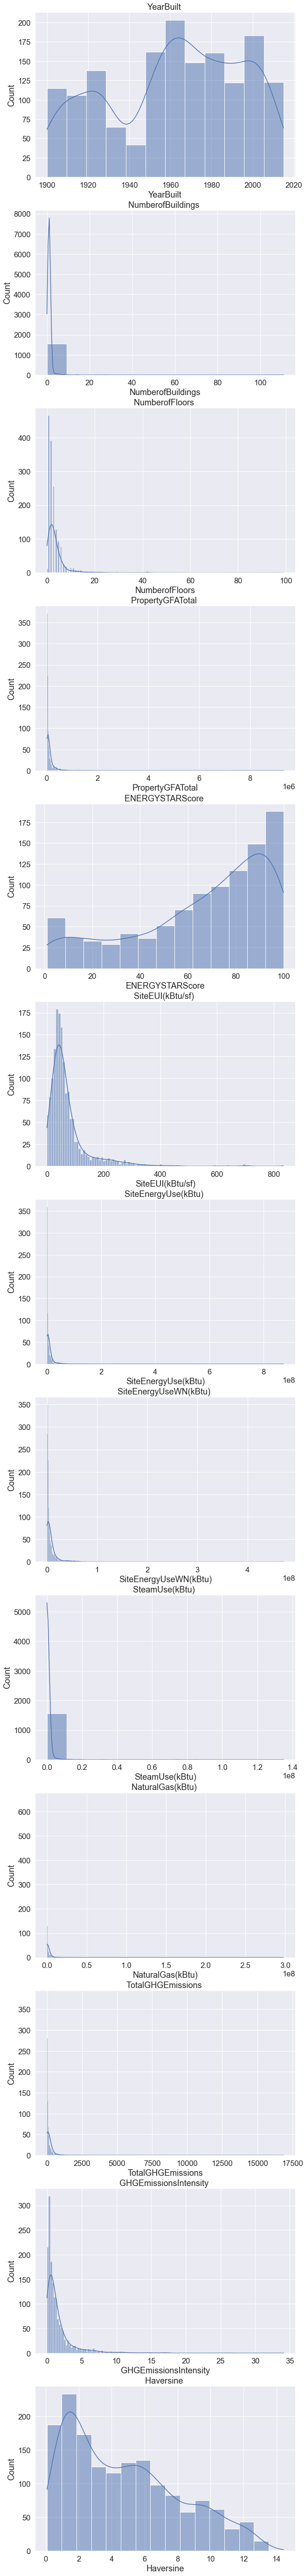

In [49]:
# Plus qu'à faire une analyse bivarié et univarié

# Univarié d'abord

l = len(colonne)

sns.set(font_scale = 1.5,rc={'figure.figsize':(60,20)})

fig,axes = plt.subplots(l,1,figsize=(10,100))

for i in range(l):
    ax = axes[i]
    ax.set_title(f"{colonne[i]} ")
    sns.histplot(data=data_2016_corr_drop[colonne[i]],ax=ax,kde=True)

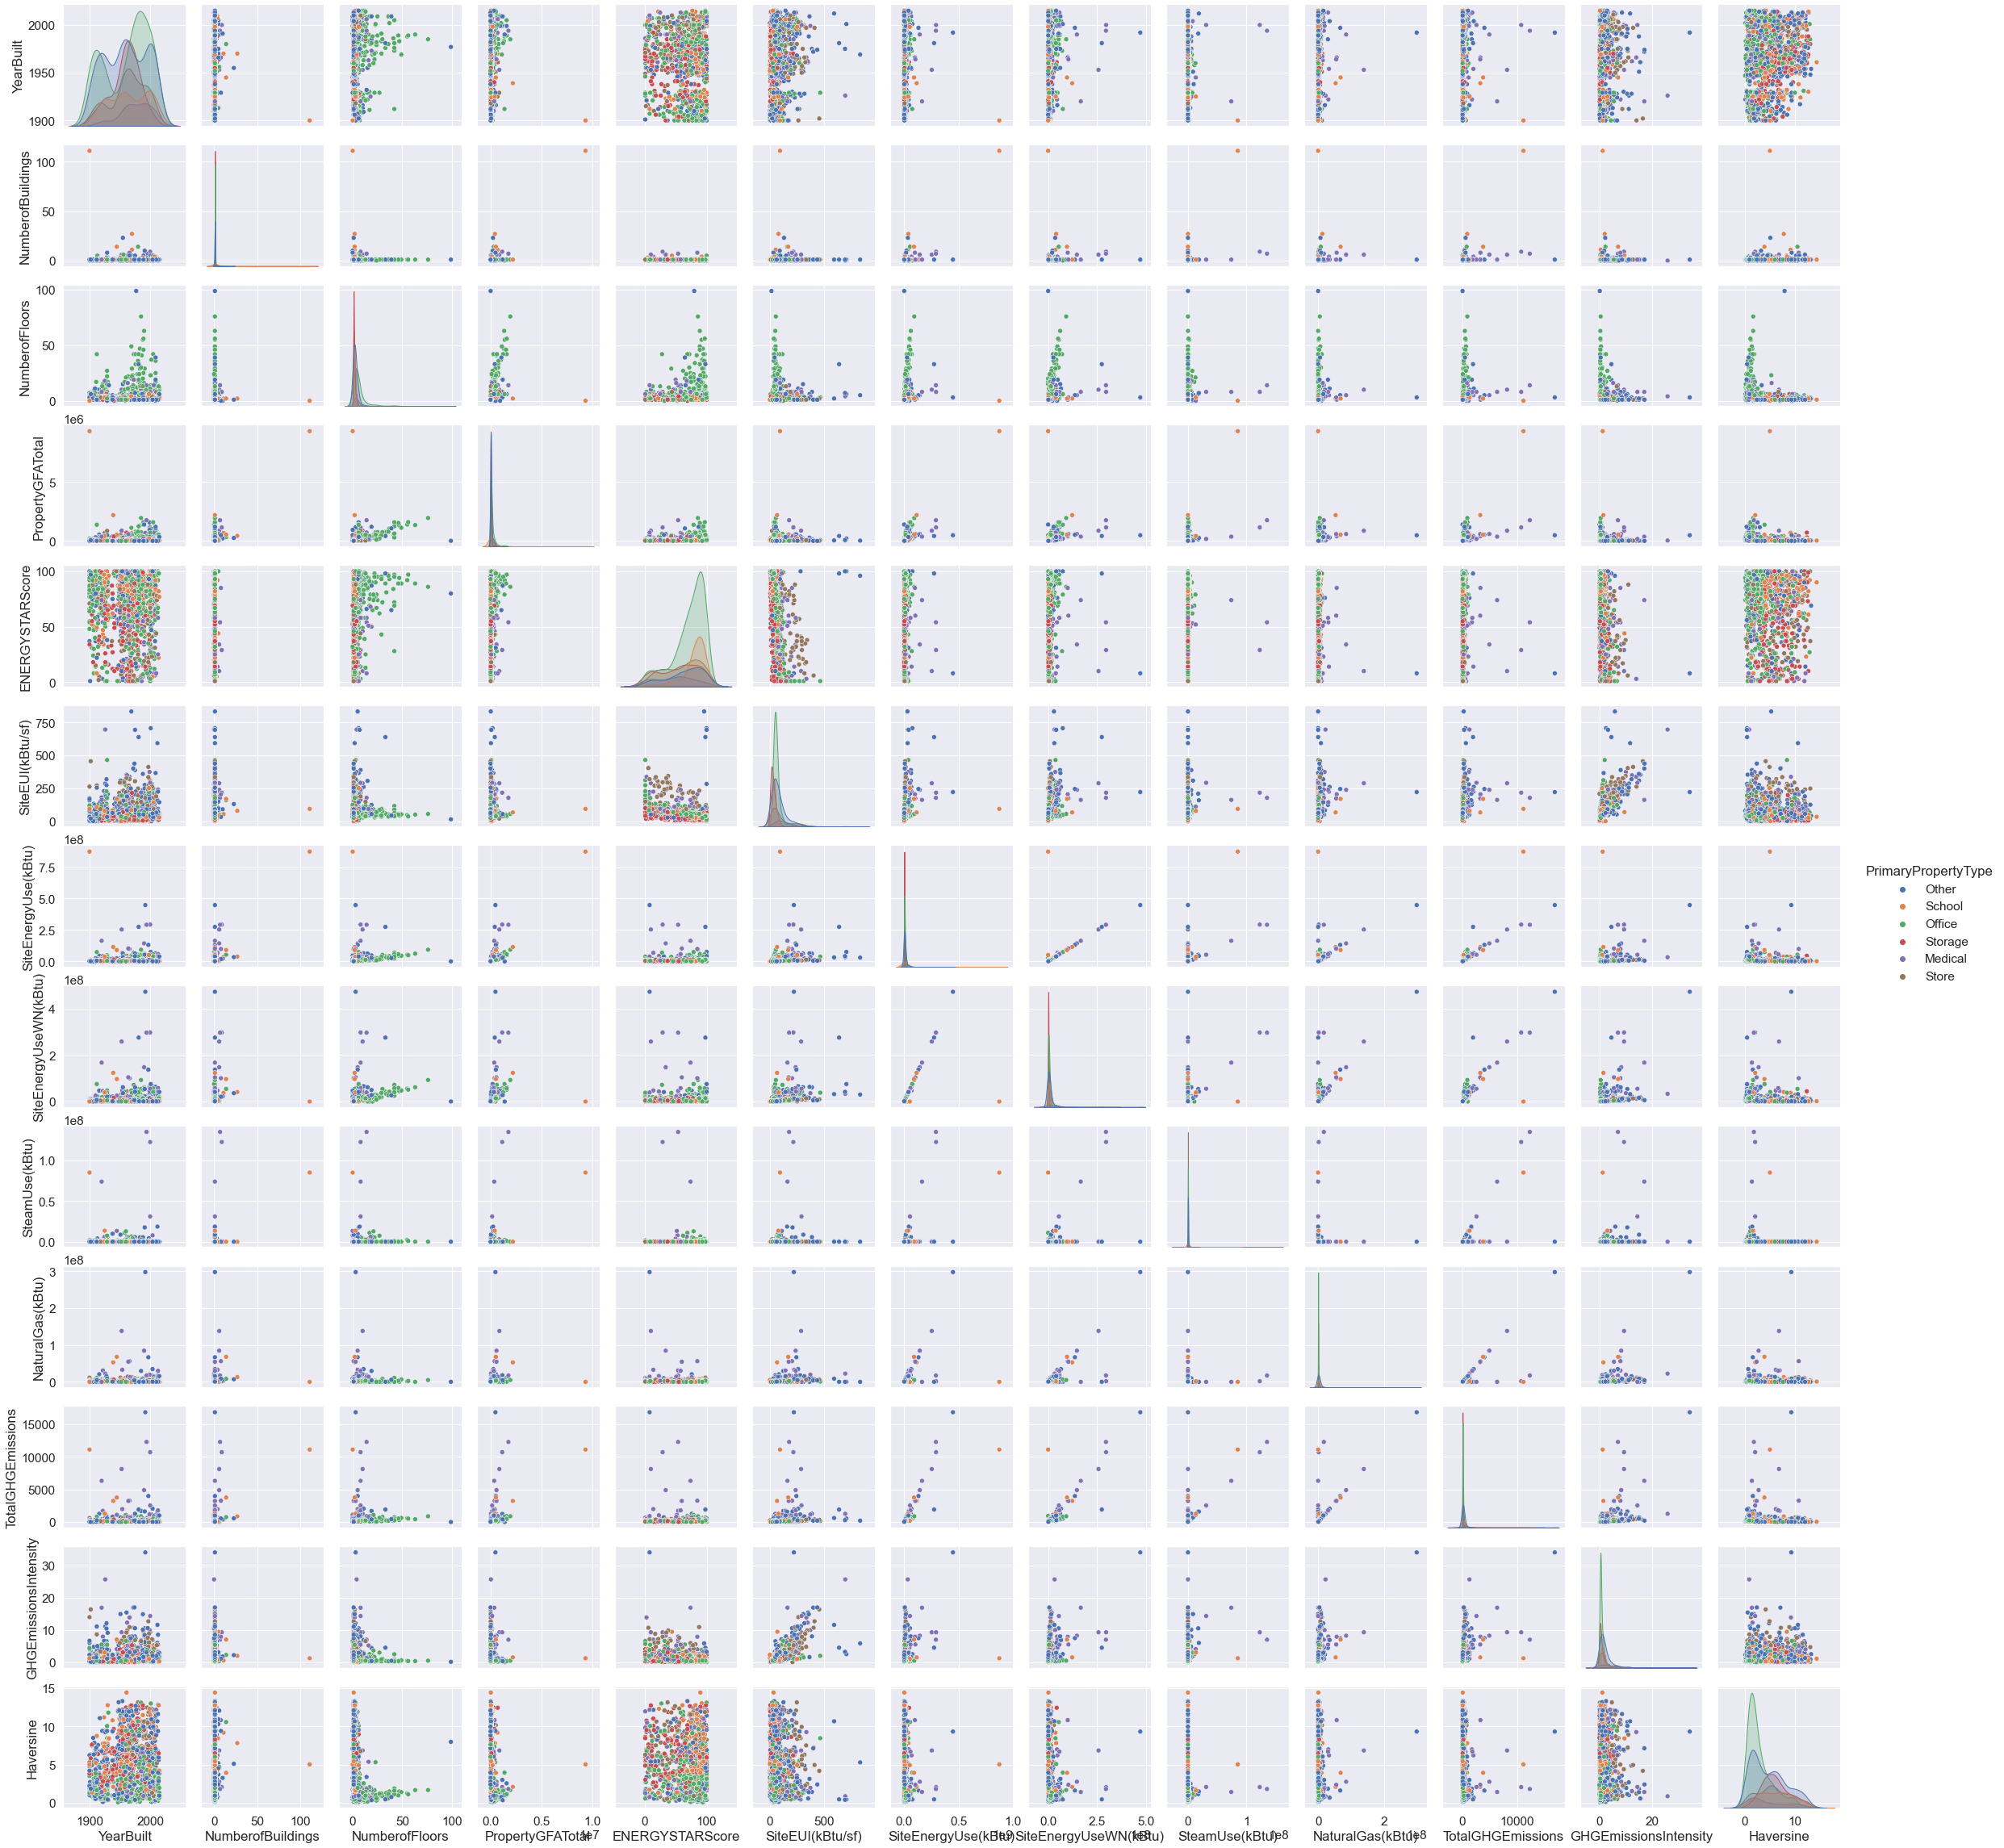

In [50]:
sns.set(font_scale = 1.4)

sns.pairplot(data=data_2016_corr_drop,hue='PrimaryPropertyType')

## One Hot Encoding

In [51]:
# Il est temps de faire un OHE sur les colonnes categoriel

In [52]:
column_cat = data_2016_corr_drop.select_dtypes(include=[object,bool]).columns
column_cat

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode'], dtype='object')

In [53]:
t = data_2016_corr_drop.PrimaryPropertyType.unique()
t

array(['Other', 'School', 'Office', 'Storage', 'Medical', 'Store'],
      dtype=object)

In [54]:
data_2016_corr_drop

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Haversine
5,NonResidential,Other,7,1999,1.0,2,97288,NaN,136.100006,1.208662e+07,1.258171e+07,0.000,4.715182e+06,301.81,3.10,0.526965
7,NonResidential,Other,7,1926,1.0,8,102761,NaN,61.299999,6.298132e+06,7.067882e+06,2276286.500,3.851890e+05,221.51,2.16,1.000639
15,NonResidential,Other,7,2004,1.0,11,412000,NaN,50.799999,1.858886e+07,1.870691e+07,737559.500,0.000000e+00,181.38,0.44,1.410882
16,NonResidential,Other,7,1930,1.0,6,103911,NaN,76.599998,9.956396e+06,1.019212e+07,4592347.500,9.101800e+05,433.86,4.18,1.514269
18,NonResidential,Other,7,1907,1.0,5,57452,NaN,132.399994,7.606084e+06,7.877219e+06,1776201.875,2.065091e+06,273.02,4.75,1.592267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,NonResidential,Office,2,1990,1.0,1,12294,46.0,69.099998,8.497457e+05,9.430032e+05,0.000,3.254750e+05,20.94,1.70,6.032459
3372,NonResidential,Other,2,2004,1.0,1,16000,NaN,59.400002,9.502762e+05,1.053706e+06,0.000,5.537300e+05,32.17,2.01,2.779996
3373,NonResidential,Other,7,1974,1.0,1,13157,NaN,438.200012,5.765898e+06,6.053764e+06,0.000,3.973739e+06,223.54,16.99,2.413426
3374,NonResidential,Other,1,1989,1.0,1,14101,NaN,51.000000,7.194712e+05,7.828413e+05,0.000,3.706010e+05,22.11,1.57,9.965802


In [55]:
# On a décidé d'utiliser un get_dummies pour garder le nom des catégories

data_2016_corr_drop = pd.concat([pd.get_dummies(data_2016_corr_drop[['PrimaryPropertyType']]),data_2016_corr_drop],axis=1)

data_2016_corr_drop = pd.concat([pd.get_dummies(data_2016_corr_drop[['CouncilDistrictCode']]),data_2016_corr_drop],axis=1)

In [56]:
# OHE Proprety

#ohe = OneHotEncoder(sparse = False)

#ohe.fit(data_2016_corr_drop[['PrimaryPropertyType']])

#proprety_encoded = ohe.transform(data_2016_corr_drop[['PrimaryPropertyType']])

In [57]:
#for i in range(6):
#    data_2016_corr_drop[f"Proprety_{i}"] = proprety_encoded.T[i]

In [58]:
data_2016_corr_drop

,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,PrimaryPropertyType_Medical,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_School,PrimaryPropertyType_Storage,PrimaryPropertyType_Store,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Haversine
5,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,1999,1.0,2,97288,NaN,136.100006,1.208662e+07,1.258171e+07,0.000,4.715182e+06,301.81,3.10,0.526965
7,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,1926,1.0,8,102761,NaN,61.299999,6.298132e+06,7.067882e+06,2276286.500,3.851890e+05,221.51,2.16,1.000639
15,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,2004,1.0,11,412000,NaN,50.799999,1.858886e+07,1.870691e+07,737559.500,0.000000e+00,181.38,0.44,1.410882
16,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,1930,1.0,6,103911,NaN,76.599998,9.956396e+06,1.019212e+07,4592347.500,9.101800e+05,433.86,4.18,1.514269
18,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,1907,1.0,5,57452,NaN,132.399994,7.606084e+06,7.877219e+06,1776201.875,2.065091e+06,273.02,4.75,1.592267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,1,0,0,0,0,0,0,1,0,0,0,0,NonResidential,Office,2,1990,1.0,1,12294,46.0,69.099998,8.497457e+05,9.430032e+05,0.000,3.254750e+05,20.94,1.70,6.032459
3372,0,1,0,0,0,0,0,0,0,1,0,0,0,NonResidential,Other,2,2004,1.0,1,16000,NaN,59.400002,9.502762e+05,1.053706e+06,0.000,5.537300e+05,32.17,2.01,2.779996
3373,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,1974,1.0,1,13157,NaN,438.200012,5.765898e+06,6.053764e+06,0.000,3.973739e+06,223.54,16.99,2.413426
3374,1,0,0,0,0,0,0,0,0,1,0,0,0,NonResidential,Other,1,1989,1.0,1,14101,NaN,51.000000,7.194712e+05,7.828413e+05,0.000,3.706010e+05,22.11,1.57,9.965802


In [59]:
# OHE CouncilDistrictCode

#ohe_concil = OneHotEncoder(sparse = False)

#ohe_concil.fit(data_2016_corr_drop[['CouncilDistrictCode']])

#concil_encoded = ohe_concil.transform(data_2016_corr_drop[['CouncilDistrictCode']])

#for i in range(6):
#    data_2016_corr_drop[f"Concil_{i}"] = concil_encoded.T[i]

In [60]:
data_2016_corr_drop

,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,PrimaryPropertyType_Medical,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_School,PrimaryPropertyType_Storage,PrimaryPropertyType_Store,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Haversine
5,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,1999,1.0,2,97288,NaN,136.100006,1.208662e+07,1.258171e+07,0.000,4.715182e+06,301.81,3.10,0.526965
7,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,1926,1.0,8,102761,NaN,61.299999,6.298132e+06,7.067882e+06,2276286.500,3.851890e+05,221.51,2.16,1.000639
15,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,2004,1.0,11,412000,NaN,50.799999,1.858886e+07,1.870691e+07,737559.500,0.000000e+00,181.38,0.44,1.410882
16,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,1930,1.0,6,103911,NaN,76.599998,9.956396e+06,1.019212e+07,4592347.500,9.101800e+05,433.86,4.18,1.514269
18,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,1907,1.0,5,57452,NaN,132.399994,7.606084e+06,7.877219e+06,1776201.875,2.065091e+06,273.02,4.75,1.592267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,1,0,0,0,0,0,0,1,0,0,0,0,NonResidential,Office,2,1990,1.0,1,12294,46.0,69.099998,8.497457e+05,9.430032e+05,0.000,3.254750e+05,20.94,1.70,6.032459
3372,0,1,0,0,0,0,0,0,0,1,0,0,0,NonResidential,Other,2,2004,1.0,1,16000,NaN,59.400002,9.502762e+05,1.053706e+06,0.000,5.537300e+05,32.17,2.01,2.779996
3373,0,0,0,0,0,0,1,0,0,1,0,0,0,NonResidential,Other,7,1974,1.0,1,13157,NaN,438.200012,5.765898e+06,6.053764e+06,0.000,3.973739e+06,223.54,16.99,2.413426
3374,1,0,0,0,0,0,0,0,0,1,0,0,0,NonResidential,Other,1,1989,1.0,1,14101,NaN,51.000000,7.194712e+05,7.828413e+05,0.000,3.706010e+05,22.11,1.57,9.965802


In [61]:
# Pas besoin de 0HE Building type (il n'y a qu'une seul categorie à l'interieur)

In [62]:
# Preparons le dataset sans les colonnes categoriel à présent

data_2016_rdy = data_2016_corr_drop.drop(columns = column_cat).copy()

In [63]:
data_2016_rdy

,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,PrimaryPropertyType_Medical,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_School,PrimaryPropertyType_Storage,PrimaryPropertyType_Store,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Haversine
5,0,0,0,0,0,0,1,0,0,1,0,0,0,1999,1.0,2,97288,NaN,136.100006,1.208662e+07,1.258171e+07,0.000,4.715182e+06,301.81,3.10,0.526965
7,0,0,0,0,0,0,1,0,0,1,0,0,0,1926,1.0,8,102761,NaN,61.299999,6.298132e+06,7.067882e+06,2276286.500,3.851890e+05,221.51,2.16,1.000639
15,0,0,0,0,0,0,1,0,0,1,0,0,0,2004,1.0,11,412000,NaN,50.799999,1.858886e+07,1.870691e+07,737559.500,0.000000e+00,181.38,0.44,1.410882
16,0,0,0,0,0,0,1,0,0,1,0,0,0,1930,1.0,6,103911,NaN,76.599998,9.956396e+06,1.019212e+07,4592347.500,9.101800e+05,433.86,4.18,1.514269
18,0,0,0,0,0,0,1,0,0,1,0,0,0,1907,1.0,5,57452,NaN,132.399994,7.606084e+06,7.877219e+06,1776201.875,2.065091e+06,273.02,4.75,1.592267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,1,0,0,0,0,0,0,1,0,0,0,0,1990,1.0,1,12294,46.0,69.099998,8.497457e+05,9.430032e+05,0.000,3.254750e+05,20.94,1.70,6.032459
3372,0,1,0,0,0,0,0,0,0,1,0,0,0,2004,1.0,1,16000,NaN,59.400002,9.502762e+05,1.053706e+06,0.000,5.537300e+05,32.17,2.01,2.779996
3373,0,0,0,0,0,0,1,0,0,1,0,0,0,1974,1.0,1,13157,NaN,438.200012,5.765898e+06,6.053764e+06,0.000,3.973739e+06,223.54,16.99,2.413426
3374,1,0,0,0,0,0,0,0,0,1,0,0,0,1989,1.0,1,14101,NaN,51.000000,7.194712e+05,7.828413e+05,0.000,3.706010e+05,22.11,1.57,9.965802


## Selection des features

In [64]:
# On va à présent sélectionner les features pour les deux target : 'SiteEnergyUse(kBtu)','TotalGHGEmissions'

In [65]:
energy_corr = data_2016_rdy.corrwith(data_2016_rdy['SiteEnergyUse(kBtu)']).abs().sort_values(ascending=False)
energy_corr

SiteEnergyUse(kBtu)            1.000000
TotalGHGEmissions              0.859081
PropertyGFATotal               0.801930
NumberofBuildings              0.718486
SiteEnergyUseWN(kBtu)          0.699190
SteamUse(kBtu)                 0.604367
NaturalGas(kBtu)               0.500873
GHGEmissionsIntensity          0.298902
SiteEUI(kBtu/sf)               0.271521
NumberofFloors                 0.209608
PrimaryPropertyType_Medical    0.161688
PrimaryPropertyType_Storage    0.085270
Haversine                      0.080531
ENERGYSTARScore                0.068474
YearBuilt                      0.061397
CouncilDistrictCode_2          0.057967
CouncilDistrictCode_3          0.055550
CouncilDistrictCode_4          0.049166
CouncilDistrictCode_7          0.043829
CouncilDistrictCode_6          0.039646
PrimaryPropertyType_Store      0.038212
CouncilDistrictCode_1          0.035967
CouncilDistrictCode_5          0.028735
PrimaryPropertyType_School     0.023610
PrimaryPropertyType_Other      0.003879


In [66]:
column_energy_corr = (list(energy_corr[(energy_corr >= 0.05) & (energy_corr <= 0.82)].index) + ['SiteEnergyUse(kBtu)'])

# On retire les features de même nature que la target

column_energy_corr = list(set(column_energy_corr) - set(['SiteEnergyUseWN(kBtu)','SiteEUI(kBtu/sf)','SteamUse(kBtu)',\
                                                         'GHGEmissionsIntensity','NaturalGas(kBtu)']))

column_energy_corr

['CouncilDistrictCode_3',
 'SiteEnergyUse(kBtu)',
 'ENERGYSTARScore',
 'Haversine',
 'NumberofFloors',
 'CouncilDistrictCode_2',
 'YearBuilt',
 'NumberofBuildings',
 'PropertyGFATotal',
 'PrimaryPropertyType_Storage',
 'PrimaryPropertyType_Medical']

In [67]:
GHE_corr = data_2016_rdy.corrwith(data_2016_rdy['TotalGHGEmissions']).abs().sort_values(ascending=False)
GHE_corr

TotalGHGEmissions              1.000000
SiteEnergyUse(kBtu)            0.859081
SiteEnergyUseWN(kBtu)          0.853298
NaturalGas(kBtu)               0.728197
SteamUse(kBtu)                 0.679457
PropertyGFATotal               0.516772
GHGEmissionsIntensity          0.467561
NumberofBuildings              0.425089
SiteEUI(kBtu/sf)               0.254490
PrimaryPropertyType_Medical    0.239044
CouncilDistrictCode_3          0.107122
NumberofFloors                 0.104624
ENERGYSTARScore                0.095927
PrimaryPropertyType_Storage    0.073592
PrimaryPropertyType_Office     0.063890
YearBuilt                      0.050382
CouncilDistrictCode_2          0.046046
Haversine                      0.041137
PrimaryPropertyType_Store      0.031966
CouncilDistrictCode_6          0.030179
CouncilDistrictCode_4          0.026265
CouncilDistrictCode_1          0.025794
CouncilDistrictCode_5          0.019814
PrimaryPropertyType_School     0.018246
PrimaryPropertyType_Other      0.017479


In [68]:
column_GHE_corr = list(GHE_corr[(GHE_corr >= 0.05) & (GHE_corr <= 0.8)].index) + ['TotalGHGEmissions']

# On retire les features de même nature que la target

column_GHE_corr = list(set(column_GHE_corr) - set(['SteamUse(kBtu)','NaturalGas(kBtu)','SiteEUI(kBtu/sf)','GHGEmissionsIntensity']))

column_GHE_corr 

['CouncilDistrictCode_3',
 'TotalGHGEmissions',
 'ENERGYSTARScore',
 'NumberofFloors',
 'YearBuilt',
 'NumberofBuildings',
 'PropertyGFATotal',
 'PrimaryPropertyType_Storage',
 'PrimaryPropertyType_Office',
 'PrimaryPropertyType_Medical']

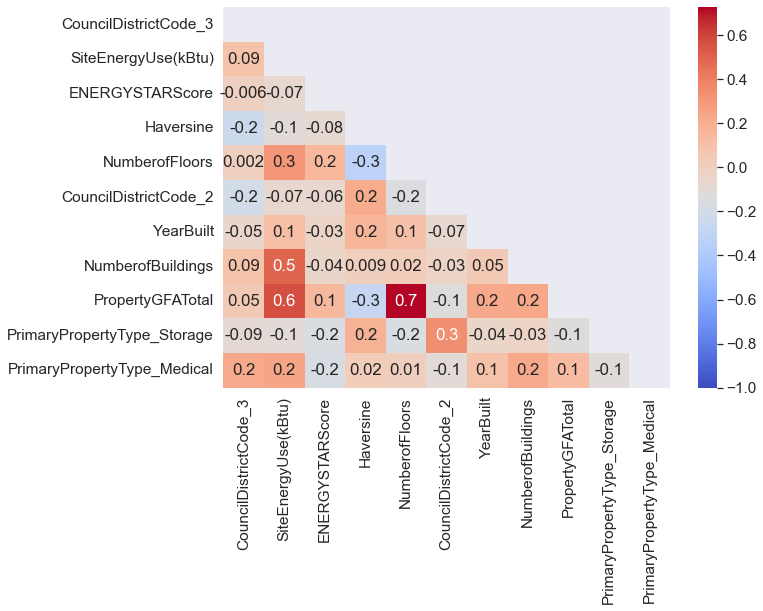

In [69]:
data_energy = data_2016_rdy[column_energy_corr].dropna().copy()

plot_correl_map(data_energy)

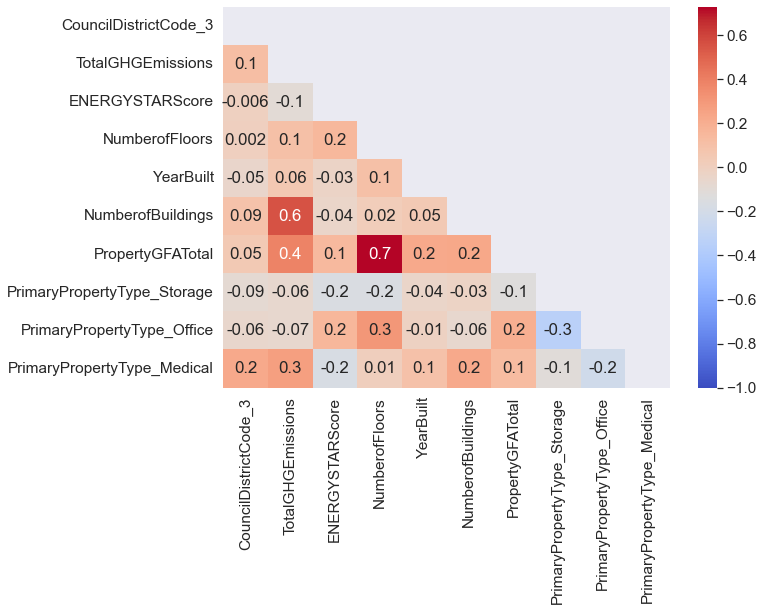

In [70]:
data_GHE = data_2016_rdy[column_GHE_corr].dropna().copy()

plot_correl_map(data_GHE)

In [71]:
# Plus qu'a exporter le resultat pour la suite

data_energy.to_csv('donnée_new\data_energy.csv',index=False)

data_GHE.to_csv('donnée_new\data_GHE.csv',index=False)
